# Data and information quality project

### Project description: DQ problem is Feature Dependency, ML task is Classification ("DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP")

### Import all the necessary libraries

In [3]:
import pandas as pd
import numpy as np
from A_data_collection import make_dataset_for_classification
from D_data_analysis import classification
from E_plot_results import plot
#from generate_correlated_features import inject_one_correlated_feature
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/ajeje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ajeje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### List of Classification algorithms

In [5]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]

#Seed is set in order to assure reproducibility of experiments
SEED = 2023

### Utility functions

In [6]:
def data_exploration(X_passed,y):
    # Convert the array to a DataFrame for better visualization (optional)
    number_of_columns= X_passed.shape[1]
    columns=list()
    for i in range(0,number_of_columns):
        columns.append(f"Feature {i}")
    df = pd.DataFrame(X_passed, columns=columns)

    # Display basic information about the structure
    print("Structure Information:")
    print(df.info())

    # Display the first few rows of the structure
    print("\nFirst Few Rows of the Structure:")
    print(df.head())

    # Summary statistics of the structure
    print("\nSummary Statistics:")
    print(df.describe())


    # Visualize the distribution of each feature using histograms
    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of Features")
    plt.show()

    # Visualize the correlation matrix using a heatmap
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

#APPLY PCA
    df['Target'] = y

    # Standardize the data
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(df.drop('Target', axis=1))

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components
    pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Concatenate the principal components with the original DataFrame and the target variable
    final_df = pd.concat([pc_df, df['Target']], axis=1)

    # Visualize the data in the reduced-dimensional space, colored by the target variable
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Target', data=final_df, palette='viridis', alpha=0.7)
    plt.title('PCA: Reduced-dimensional Space with Target Variable')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend(title='Target', loc='upper right', labels=['Class 0', 'Class 1'])
    plt.show()

In [7]:
def inject_one_correlated_feature(X, target_feature_index, correlation_strength):

    
    # Assuming you have a dataset X with 1000 records and 5 features
    # Replace this with your actual dataset or generate a sample dataset
    # Ensure that the correlation coefficient is within the valid range
    correlation_strength = np.clip(correlation_strength, -1, 1)

    new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2) * np.random.randn(1000)

    #new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2)
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_feature.reshape(-1, 1)))


    # Print the correlation matrix to verify the correlation
    correlation_matrix = np.corrcoef(X_with_new_feature, rowvar=False)
    #print("Correlation Matrix:")
    #print(correlation_matrix)


    # Access the correlation between the original feature and the new feature
    correlation_with_target_feature = correlation_matrix[-1, target_feature_index]
    print(f"Correlation with the target feature: {correlation_with_target_feature}")


    #data_exploration(X_with_new_feature,y)

    return X_with_new_feature

In [27]:
def inject_one_non_linear_correlated_feature(number_of_experiment,X, target_feature_index):

    # Introduce a nonlinear feature with a quadratic transformation
    if number_of_experiment==6:
        new_nonlinear_feature = X[:, target_feature_index]**2 + np.random.randn(1000)
    elif number_of_experiment==7:
        new_nonlinear_feature = np.cos(X[:, target_feature_index]) + np.random.randn(1000)
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_nonlinear_feature.reshape(-1, 1)))


    # Print the correlation matrix to verify the correlation
    correlation_matrix = np.corrcoef(X_with_new_feature, rowvar=False)
    #print("Correlation Matrix:")
    #print(correlation_matrix)


    # Access the correlation between the original feature and the new feature
    correlation_with_target_feature = correlation_matrix[-1, target_feature_index]
    print(f"Correlation with the target feature: {correlation_with_target_feature}")




    return X_with_new_feature

In [47]:
def inject_combination_of_features(number_of_experiment,X,i,j):

    # Introduce a combination feature with a quadratic transformation
    if number_of_experiment==8:
        new_combination_feature = X[:,i] * X[:,j]
    
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_combination_feature.reshape(-1, 1)))


    return X_with_new_feature

### Create dataset for most of the experiments. And some data analysis

In [9]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

Structure Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 0  1000 non-null   float64
 1   Feature 1  1000 non-null   float64
 2   Feature 2  1000 non-null   float64
 3   Feature 3  1000 non-null   float64
 4   Feature 4  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None

First Few Rows of the Structure:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
0  -3.044852   0.401225   1.876653   1.566605  -2.132950
1   1.445783   1.330753   1.140285   0.706253   2.422165
2   2.404213   1.620161  -0.710273  -3.793487   1.183956
3   1.573431  -0.558834   0.359672   0.777892   2.637753
4  -0.849001   2.114740   3.329424  -1.255837  -1.173801

Summary Statistics:
         Feature 0    Feature 1    Feature 2    Feature 3    Feature 4
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   

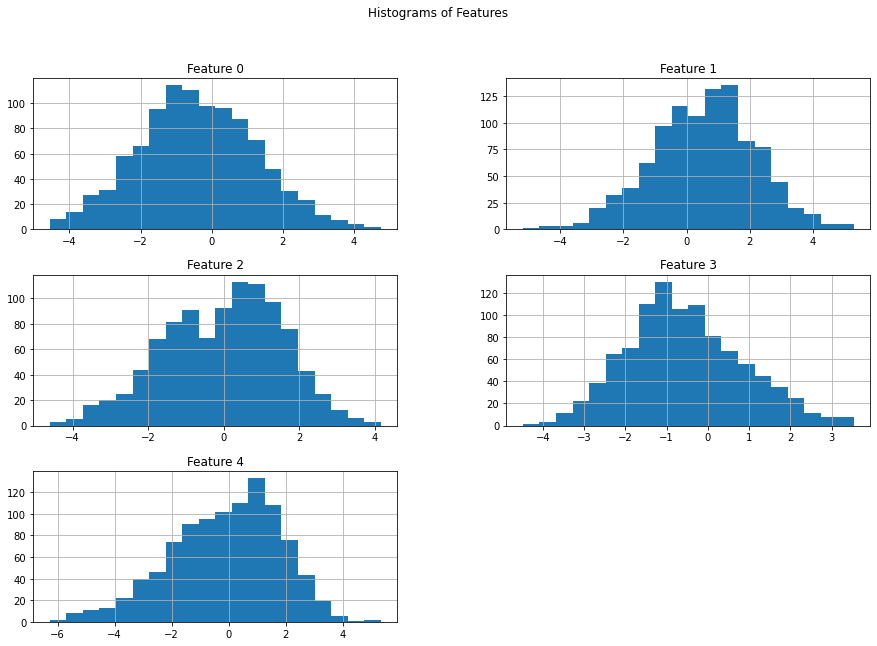

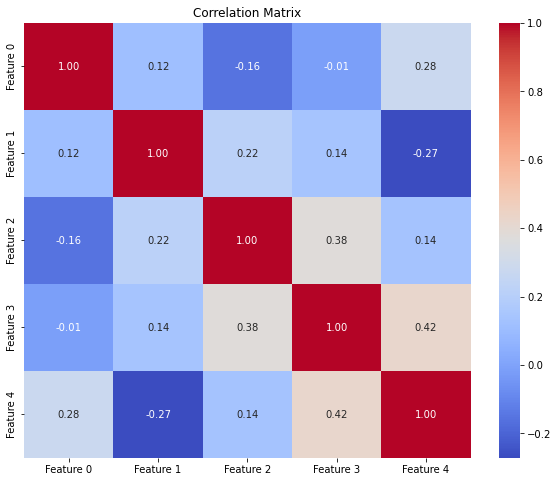

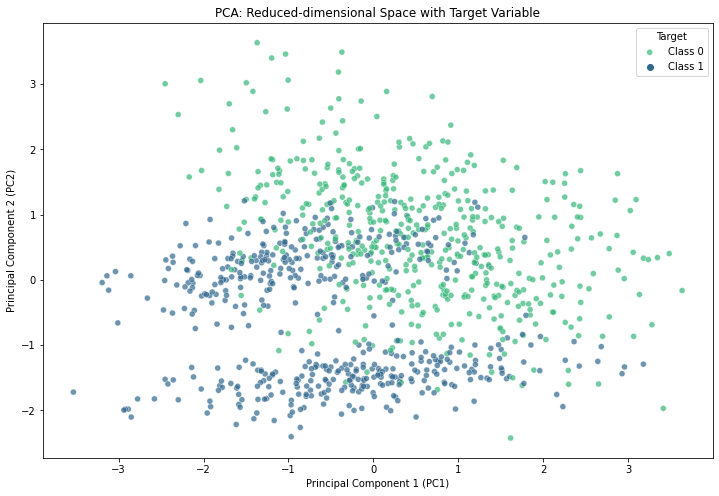

In [10]:
data_exploration(X,y)

### Experiment Function

In [41]:
def perform_experiment(number_of_experiment,X,y,CLASSIFICATION_ALGORITHMS,correlation_strength):
    #initialize the array for the results for each algorithm
    results_for_each_algorithm = []

    for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        #base model on base original dataset
        results_base_analysis = classification(X, y, algorithm, SEED)
        results_single_algorithm.append(results_base_analysis)

        #HERE WE INTRODUCE A FSM

        #EXPERIMENT 1: ONE CORRELATED FEATURE WITH DIFFERENT CORRELATION
        if number_of_experiment==1:
            correlation_coefficient = correlation_strength
            for i in range(0, 6): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
                #Data pollution
                
                existing_feature_index = 0  # Choose the existing feature with which you want to correlate
                correlation_coefficient = correlation_coefficient + 0.1 # Adjust the correlation strength

                if i==5:
                    correlation_coefficient=1
                

                X_with_new_feature = inject_one_correlated_feature(X, existing_feature_index, correlation_coefficient)
                
                
                # DATA ANALYSIS
            
                results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                results_single_algorithm.append(results_1_analysis)

        #EXPERIMENT 2: GROWING NUMBER OF FEATURES WITH LOW CORRELATION
        #EXPERIMENT 3: GROWING NUMBER OF FEATURES WITH MEDIUM CORRELATION
        #EXPERIMENT 4: GROWING NUMBER OF FEATURES WITH HIGH CORRELATION
        #EXPERIMENT 5: GROWING NUMBER OF FEATURES WITH NEGATIVE CORRELATION
        #EXPERIMENT 6: NON LINEAR QUADRATIC
        #EXPERIMENT 7: NON LINEAR COSINE
        #EXPERIMENT 8: COMBINATION OF FEATURES
        #THE RESULT DEPENDS ON THE CORRELATION STRENGTH PARAMETER 
        elif number_of_experiment in [2,3,4,5,6,7]:

            X_with_new_feature = X

            for i in range(0, 15): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
               
                #Data pollution
                if number_of_experiment in [2,3,4,5]:
                    for j in range(0,X.shape[1]):
                        existing_feature_index = j
                        print(existing_feature_index)
                        X_with_new_feature = inject_one_correlated_feature(X_with_new_feature, existing_feature_index, correlation_strength)
                    
                    # DATA ANALYSIS
                    
                    results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                    results_single_algorithm.append(results_1_analysis)

                    print(X_with_new_feature.shape)

                #EXPERIMENT 6 AND 7: NON LINEAR CORRELATED FEATURE
                elif number_of_experiment in [6,7]:
                    
                    for j in range(0,X.shape[1]):
                        existing_feature_index = j
                        print(existing_feature_index)
                        X_with_new_feature = inject_one_non_linear_correlated_feature(number_of_experiment,X_with_new_feature, existing_feature_index)
                    
                    # DATA ANALYSIS
                    
                    results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                    results_single_algorithm.append(results_1_analysis)

                    print(X_with_new_feature.shape)

        elif number_of_experiment==8:

            X_with_new_feature= X

            count_debug=0
            for i in range(0,5):
                for j in range(0,5):
                    if i>=j:
                        pass
                    else:
                        count_debug+=1
                        X_with_new_feature = inject_combination_of_features(number_of_experiment,X_with_new_feature,i,j)
                        results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                        results_single_algorithm.append(results_1_analysis)

                        print(X_with_new_feature.shape)

            print('DEBUG',count_debug)
            



        results_for_each_algorithm.append(results_single_algorithm)
    

    return results_for_each_algorithm

### Experiment 1: introduce one correlated feature with an increasing correlation strength that starts with 0.5 till 1

Correlation is around 0.5 so not so high. Let's see how increasing the number of correlated features impacts on the results

In [12]:
results_for_each_algorithm = perform_experiment(1,X,y,CLASSIFICATION_ALGORITHMS,0.25)

print(results_for_each_algorithm)

Training for DecisionTree...
Correlation with the target feature: 0.5217131924268809
Training for DecisionTree...
Correlation with the target feature: 0.6388660314272877
Training for DecisionTree...
Correlation with the target feature: 0.7061036855644298
Training for DecisionTree...
Correlation with the target feature: 0.8093322086977104
Training for DecisionTree...
Correlation with the target feature: 0.8816828379889161
Training for DecisionTree...
Correlation with the target feature: 1.0
Training for DecisionTree...
Training for LogisticRegression...
Correlation with the target feature: 0.5272980512780797
Training for LogisticRegression...
Correlation with the target feature: 0.6466260817883233
Training for LogisticRegression...
Correlation with the target feature: 0.746401643843795
Training for LogisticRegression...
Correlation with the target feature: 0.8273604199565922
Training for LogisticRegression...
Correlation with the target feature: 0.8812928918122037
Training for LogisticR

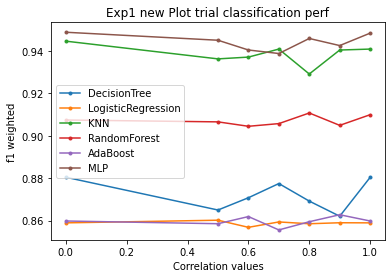

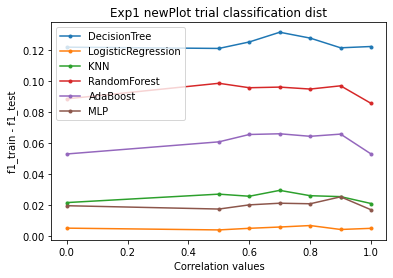

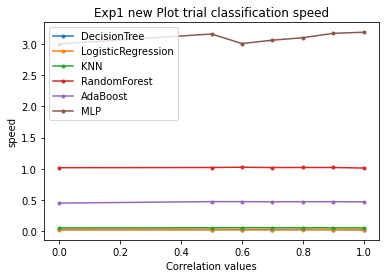

In [13]:
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 newPlot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 2: growing number of features low correlation

In [14]:
results_for_each_algorithm = perform_experiment(2,X,y,CLASSIFICATION_ALGORITHMS,0.35)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.505717608490963
1
Correlation with the target feature: 0.5448041727359763
2
Correlation with the target feature: 0.5132102588081491
3
Correlation with the target feature: 0.47540995006386544
4
Correlation with the target feature: 0.591352163121207
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.515006993832227
1
Correlation with the target feature: 0.5071768667062668
2
Correlation with the target feature: 0.5341270935912289
3
Correlation with the target feature: 0.4570592251960704
4
Correlation with the target feature: 0.5756660654388311
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.5468106674491606
1
Correlation with the target feature: 0.4791433621276546
2
Correlation with the target feature: 0.4232009014735393
3
Correlation with the target feature: 0.46912172954849823
4
Correlation with the target feature: 0.5502554751845438
Training for DecisionT

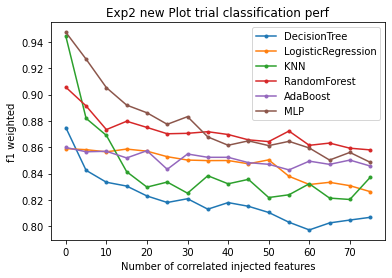

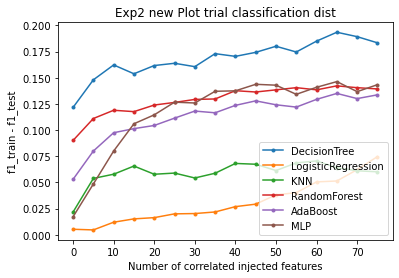

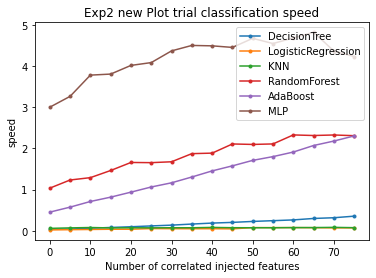

In [15]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 3: growing number of feature with medium correlation

In [16]:
results_for_each_algorithm = perform_experiment(3,X,y,CLASSIFICATION_ALGORITHMS,0.5)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.6828583708036442
1
Correlation with the target feature: 0.6960914752814378
2
Correlation with the target feature: 0.6645186246011049
3
Correlation with the target feature: 0.6268731521109511
4
Correlation with the target feature: 0.7184703983868099
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.689937354752179
1
Correlation with the target feature: 0.6652262051789358
2
Correlation with the target feature: 0.6432188224492192
3
Correlation with the target feature: 0.6244200703787439
4
Correlation with the target feature: 0.7356589935130949
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.6934962132045646
1
Correlation with the target feature: 0.7097956499803647
2
Correlation with the target feature: 0.6872954863468407
3
Correlation with the target feature: 0.6419651963332587
4
Correlation with the target feature: 0.7312400516584159
Training for DecisionT

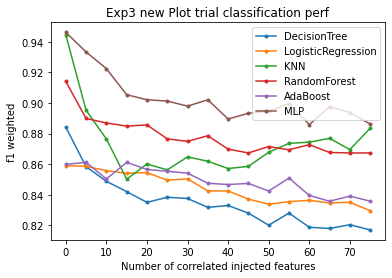

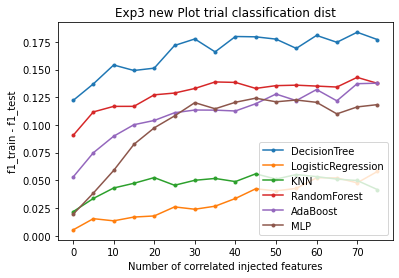

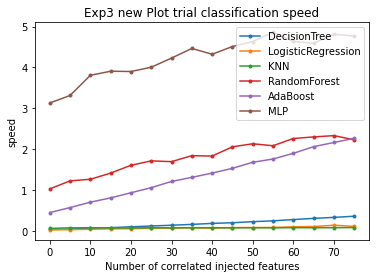

In [17]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp3 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp3 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp3 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 4: growing number of feature with high correlation

In [18]:
results_for_each_algorithm = perform_experiment(4,X,y,CLASSIFICATION_ALGORITHMS,0.85)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.9286447902188135
1
Correlation with the target feature: 0.9333367277443899
2
Correlation with the target feature: 0.9271650735991941
3
Correlation with the target feature: 0.9167083724653904
4
Correlation with the target feature: 0.9506825827466027
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.9350366576112054
1
Correlation with the target feature: 0.9352382339196573
2
Correlation with the target feature: 0.9327626006477814
3
Correlation with the target feature: 0.9119733818599081
4
Correlation with the target feature: 0.9495547507637142
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.9349147692568811
1
Correlation with the target feature: 0.9332336200230289
2
Correlation with the target feature: 0.9217898718664677
3
Correlation with the target feature: 0.911612476230376
4
Correlation with the target feature: 0.9511088913533206
Training for DecisionT

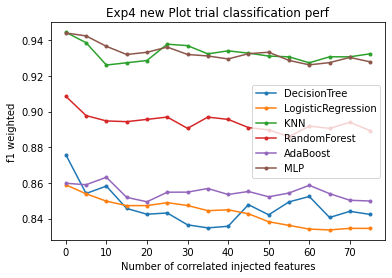

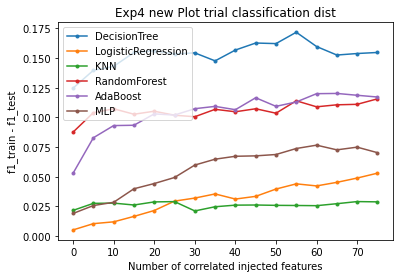

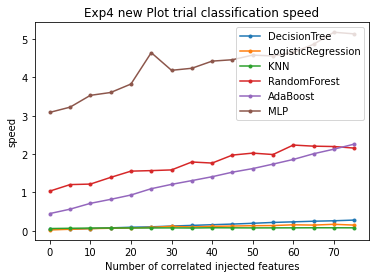

In [19]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp4 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp4 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp4 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 5: growing number of feature with negative correlation

In [20]:
results_for_each_algorithm = perform_experiment(5,X,y,CLASSIFICATION_ALGORITHMS,-0.5)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: -0.6891081580310717
1
Correlation with the target feature: -0.6694140920329057
2
Correlation with the target feature: -0.6972118470130075
3
Correlation with the target feature: -0.6413077175822184
4
Correlation with the target feature: -0.7423652425298591
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: -0.6799348152107227
1
Correlation with the target feature: -0.6570462643808319
2
Correlation with the target feature: -0.6879314494212837
3
Correlation with the target feature: -0.6199873956419522
4
Correlation with the target feature: -0.7371725595003789
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: -0.7091764870625429
1
Correlation with the target feature: -0.6808309851675808
2
Correlation with the target feature: -0.6476606658929754
3
Correlation with the target feature: -0.6132189078504215
4
Correlation with the target feature: -0.7566485127838332
Traini

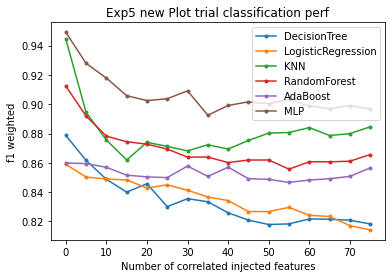

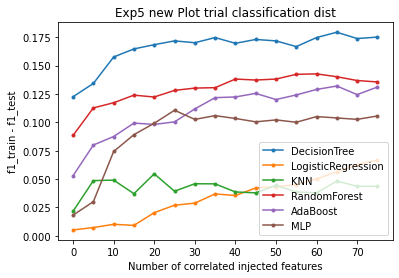

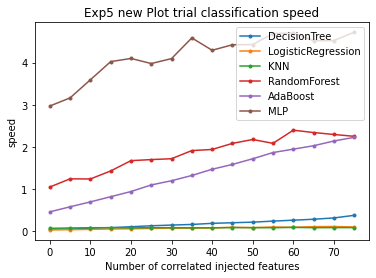

In [21]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp5 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp5 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp5 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 6: inject more and more non linear correlated features (power of 2 of a feature)

In [39]:
results_for_each_algorithm = perform_experiment(6,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: -0.25058273761109157
1
Correlation with the target feature: 0.33143521989508995
2
Correlation with the target feature: -0.18656050777361852
3
Correlation with the target feature: -0.3236173473122975
4
Correlation with the target feature: -0.36808595449290316
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: -0.27046678802230634
1
Correlation with the target feature: 0.32845237865261123
2
Correlation with the target feature: -0.18992406282635332
3
Correlation with the target feature: -0.31034047324857233
4
Correlation with the target feature: -0.369148859297069
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: -0.27342017292425314
1
Correlation with the target feature: 0.3308578093151517
2
Correlation with the target feature: -0.19167883708090738
3
Correlation with the target feature: -0.31849325010135837
4
Correlation with the target feature: -0.3830193119370408

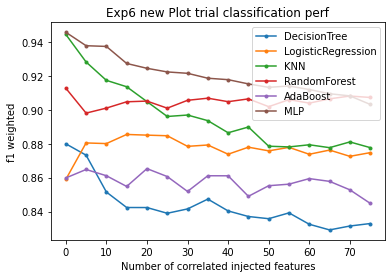

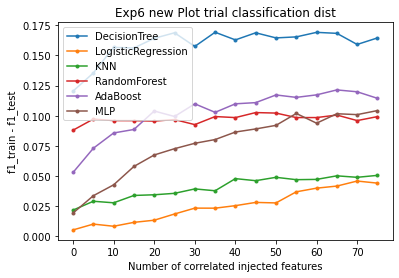

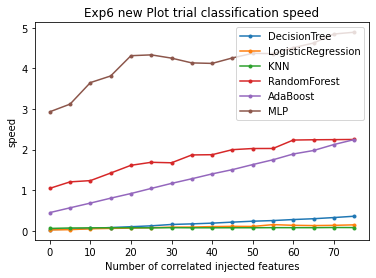

In [40]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp6 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp6 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp6 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 7: inject more and more non linear correlated features (cosine)

In [51]:
results_for_each_algorithm = perform_experiment(7,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.15701523909530576
1
Correlation with the target feature: -0.16958601233573195
2
Correlation with the target feature: 0.048516279143433344
3
Correlation with the target feature: 0.20499203313768413
4
Correlation with the target feature: 0.03882301318456398
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.14621199323736264
1
Correlation with the target feature: -0.19890598411561855
2
Correlation with the target feature: 0.030860571801805407
3
Correlation with the target feature: 0.21002627389186218
4
Correlation with the target feature: 0.0009662317131562992
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.1380580012915099
1
Correlation with the target feature: -0.15089867678823896
2
Correlation with the target feature: 0.022579339917208747
3
Correlation with the target feature: 0.1321740738626572
4
Correlation with the target feature: 0.036306114784359834

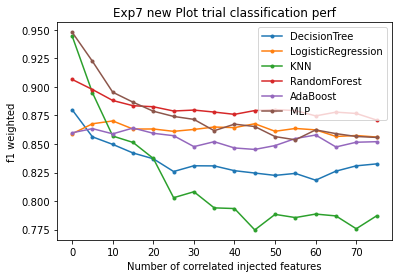

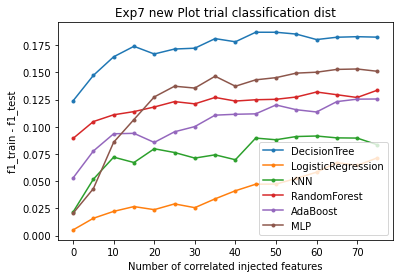

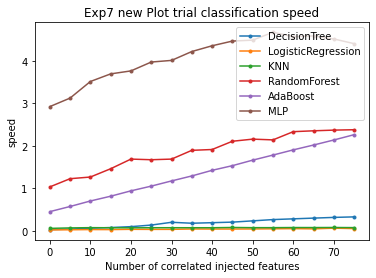

In [52]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp7 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp7 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp7 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 8: Introducing new features as combination of existing features

In [48]:
results_for_each_algorithm = perform_experiment(8,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
Training for DecisionTree...
(1000, 6)
Training for DecisionTree...
(1000, 7)
Training for DecisionTree...
(1000, 8)
Training for DecisionTree...
(1000, 9)
Training for DecisionTree...
(1000, 10)
Training for DecisionTree...
(1000, 11)
Training for DecisionTree...
(1000, 12)
Training for DecisionTree...
(1000, 13)
Training for DecisionTree...
(1000, 14)
Training for DecisionTree...
(1000, 15)
DEBUG 10
Training for LogisticRegression...
Training for LogisticRegression...
(1000, 6)
Training for LogisticRegression...
(1000, 7)
Training for LogisticRegression...
(1000, 8)
Training for LogisticRegression...
(1000, 9)
Training for LogisticRegression...
(1000, 10)
Training for LogisticRegression...
(1000, 11)
Training for LogisticRegression...
(1000, 12)
Training for LogisticRegression...
(1000, 13)
Training for LogisticRegression...
(1000, 14)
Training for LogisticRegression...
(1000, 15)
DEBUG 10
Training for KNN...
Training for KNN...
(1000, 6)
Training for KNN

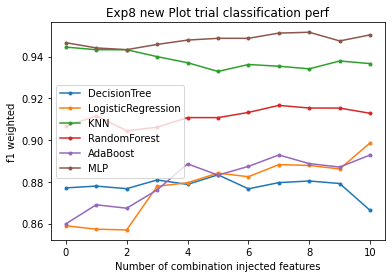

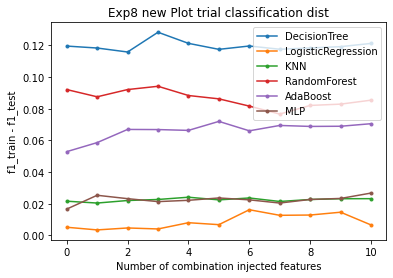

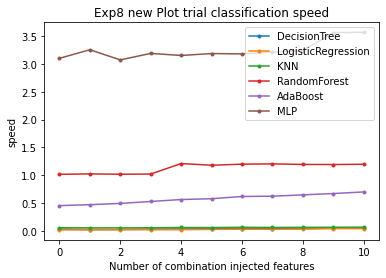

In [50]:
result_array = np.arange(0,11)
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="Exp8 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="Exp8 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="Exp8 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")